In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
data= pd.read_csv(r"\Data Science\Netflix_data\mymoviedb.csv")
data.head(3)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [65]:
data.duplicated().sum()

np.int64(10)

In [ ]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"], dayfirst= True)
print(data["Release_Date"].dtypes)

datetime64[ns]


In [67]:
data["Release_Date"]= data["Release_Date"].dt.year

In [68]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
colum= ["Overview","Original_Language" ,"Poster_Url"]
data.drop(colum, axis= 1, inplace=True)

In [70]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,6.3,Thriller
3,2021.0,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


Categoriizng vote_average column
we divide vote_average values into 4 categeories: pipoular, average, below avg, not popular usign categorize_col() function

In [ ]:
def categorize_col(dataframe, col, labels):
    
   
    
    edges =[ 
        dataframe[col].describe()["min"],
        dataframe[col].describe()["25%"],
        dataframe[col].describe()["50%"],
        dataframe[col].describe()["75%"],
        dataframe[col].describe()["max"]
        ]
    data[col]=pd.cut(data[col], edges, labels=labels, duplicates= "drop")
    return data

labels=["not_popular", "below_avg", "average", "popular"]
categorize_col(data, "Vote_Average", labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973.0,Badlands,13.357,896.0,popular,"Drama, Crime"
9833,2020.0,Violent Delights,13.356,8.0,not_popular,Horror
9834,2016.0,The Offering,13.355,94.0,not_popular,"Mystery, Thriller, Horror"
9835,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,"Music, Drama, History"


In [72]:
data["Vote_Average"].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [73]:
data.dropna(inplace=True)

In [74]:
data.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [75]:
data.head(4)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"


In [ ]:
We now split the genre into list and then explode the dataframe ot have only one genre per row for each movie

In [ ]:
data["Genre"] = data["Genre"].str.split(', ')
data= data.explode("Genre").reset_index(drop=True)
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


Casting column into category

In [ ]:
data["Genre"] =data["Genre"].astype("category")
data["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(3), object(1)
memory usage: 849.4+ KB


In [80]:
data.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

         Data Visulization

In [ ]:
sb.set_style("whitegrid")

Which is the most frequent genre of movies released on Netflix?

In [81]:
data["Genre"].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

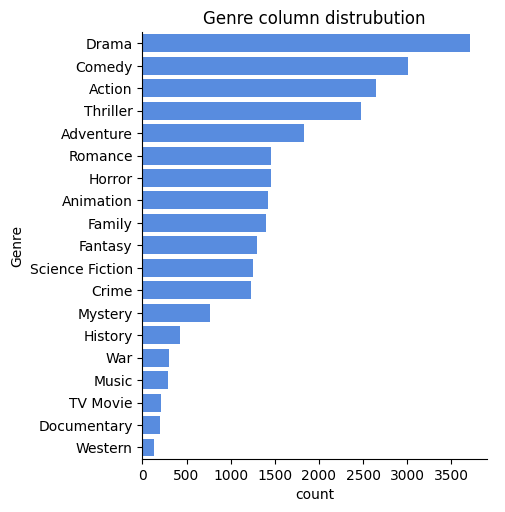

In [ ]:
sb.catplot(y= data["Genre"], data=data, kind="count", order= data["Genre"].value_counts().index,
           color="#4287f5")
plt.title("Genre column distrubution")
plt.show()

which vote category has the highest votes in vote avg column?


In [87]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


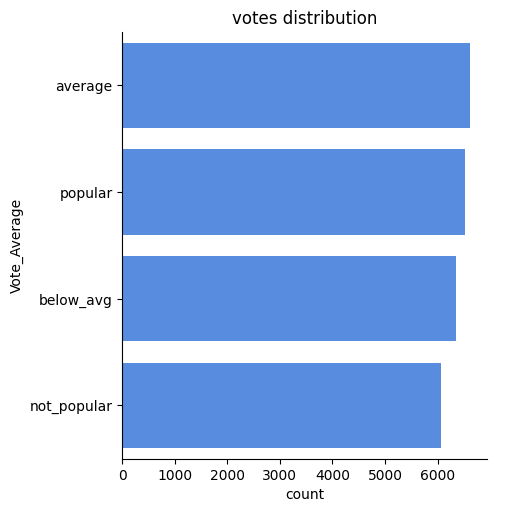

In [ ]:
sb.catplot(y= data["Vote_Average"], data=data, kind="count", order= data["Vote_Average"].value_counts().index,
           color="#4287f5")
plt.title("votes distribution")
plt.show()

which movie got the highest popularity? what its genre?

In [92]:
data[data["Popularity"]== data["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


which movie got the lowest popularity? what its genre?

In [93]:
data[data["Popularity"]== data["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984.0,Threads,13.354,186.0,popular,War
25549,1984.0,Threads,13.354,186.0,popular,Drama
25550,1984.0,Threads,13.354,186.0,popular,Science Fiction


Which year has the most filmmed movies?

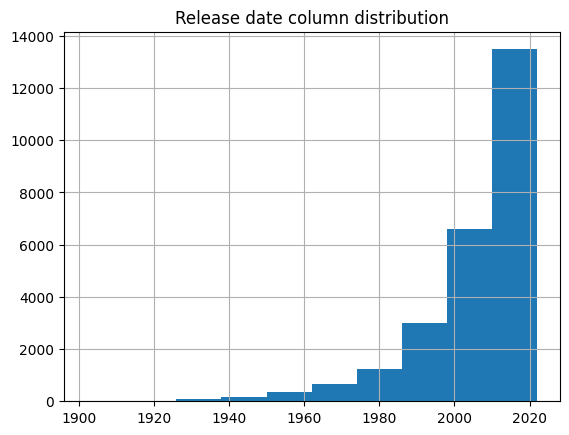

In [ ]:
data["Release_Date"].hist()
plt.title("Release date column distribution")
plt.show()